# Linear Regression - Death Rate Prediction

## Disclaimer
This was made for recreational use and should by no means be used as a means to prove the outcome of Death Rate for the human species.

## Overview
The objective of this project is to use linear regression to predict the Death Rate per 1,000 people in the world. The greadient boosting regressor will be used and this project will go step by step through each of the visualising each of the parameters to determine which values are best for the model.

## Downloads
For this project we will be using the spatial data provided on the [website](https://data.worldbank.org/indicator/SP.DYN.CDRT.IN?end=2016&start=1960&view=chart)

Starting off by importing the required modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.externals import joblib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

### Data Preparation

Load the Death Rate data

In [2]:
df = pd.read_csv("processed/Death_Rate.csv")

Check if there are any columns with missing data in our dataset

In [7]:
missing_val_before = [col for col in df.columns if df[col].isnull().any()]
print(missing_val_before)

['1961', '1963', '1964', '1965', '1967', '1968', '1969', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1990', '1993', '1995', '1997', '1998', '1999', '2000', '2001', '2003', '2004', '2006', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']


Fill in missing values in our columns with the mean value
Check for missing data again to make sure there is none

In [8]:
for val in missing_val_before:
    df[val] = df[val].fillna(df[val].mean())

missing_val_after = [col for col in df.columns if df[col].isnull().any()]
print(missing_val_after)

[]


### Feature engineering

Starting off by removing columns that have no inherent value to the model

In [9]:
del df['Country Code']
del df['Indicator Name']
del df['Indicator Code']

Replace the country names with one-hot encoding

In [10]:
features_df = pd.get_dummies(df, columns=['Country Name'])

Remove the final column form the data set as this is the data we want to predict.

In [11]:
del features_df['2016']

### Training the model

Create the X and y array. X being the input data and y being the output/predicted data.

In [12]:
X = features_df.to_numpy()
y = df['2016'].to_numpy()

Cross validation will be used in the model.  
Split the data set in a training set (70%) and a test set (30%)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Use the default GradientBoosting Regressor with verbose = 1 to see output

In [14]:
model_1 = ensemble.GradientBoostingRegressor(
    verbose=1
)

Train the model

In [15]:
model_1.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           4.8319            0.20s
         2           3.9461            0.20s
         3           3.2245            0.23s
         4           2.6329            0.22s
         5           2.1513            0.21s
         6           1.7569            0.20s
         7           1.4371            0.19s
         8           1.1742            0.18s
         9           0.9621            0.18s
        10           0.7879            0.18s
        20           0.1146            0.15s
        30           0.0219            0.13s
        40           0.0065            0.10s
        50           0.0031            0.08s
        60           0.0020            0.06s
        70           0.0016            0.05s
        80           0.0013            0.03s
        90           0.0011            0.01s
       100           0.0010            0.00s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=1, warm_start=False)

### Error rate - Mean Absolute Error

Measuring the model's accuracy using the MAE loss function as this is most often used in regression models.  
MAE is the sum of absolute differences between our target and predicted variables.    
I'll be getting the mase of the train data and the test data

In [16]:
train_mae = mean_absolute_error(y_train, model_1.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % train_mae)

test_mae = mean_absolute_error(y_test, model_1.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % test_mae)

Training Set Mean Absolute Error: 0.0262
Test Set Mean Absolute Error: 0.1330


##  Analysis

As you can see there is a alittle bit of a difference between the __Train set__ MAE and the __Test set__ MAE.  
Going by these results it's pretty clear that the model is overfitting our data.  
I'll go down through each of the paramters of the GradientBoosting Regressor to see what's going on.  
Think of model evaluation in four different categories:
- Underfitting  – Validation(Test) and training error high
- Overfitting   – Validation(Test) error is high, training error low
- Good fit      – Validation(Test) error low, slightly higher than the training error
- Unknown fit   - Validation(Test) error low, training error 'high'

### Gradient Boosting Regressor

*Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.*  (Wikipedia definition)  
The [Scikit-learn website](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) was used when obtaining information on the Gradient Boosting Regressor parameters

In [17]:
model_2 = ensemble.GradientBoostingRegressor(verbose=1)
model_2.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           4.8319            0.10s
         2           3.9461            0.20s
         3           3.2245            0.19s
         4           2.6329            0.22s
         5           2.1513            0.19s
         6           1.7569            0.19s
         7           1.4371            0.19s
         8           1.1742            0.18s
         9           0.9621            0.17s
        10           0.7879            0.17s
        20           0.1146            0.14s
        30           0.0219            0.12s
        40           0.0065            0.10s
        50           0.0031            0.08s
        60           0.0020            0.06s
        70           0.0016            0.05s
        80           0.0013            0.03s
        90           0.0011            0.01s
       100           0.0010            0.00s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=1, warm_start=False)

#### Learning Rate

Learning rate shrinks the contribution of each tree by learning_rate.  There is a trade-off between learning_rate and n_estimators.  
A large learning rate allows the model to learn faster, at the cost of arriving on a sub-optimal final set of weights.  
A smaller learning rate may allow the model to learn a more optimal or even globally optimal set of weights
but may take significantly longer to train.

Plotting Learning Rate against MAE score


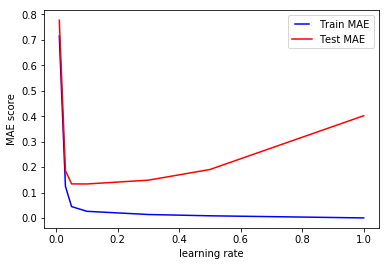

In [246]:
learning_rates = [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1.0]
train_results = []
test_results = []

for lr in learning_rates:
    model_2 = ensemble.GradientBoostingRegressor(learning_rate=lr)
    model_2.fit(X_train, y_train)

    train_pred = model_2.predict(X_train)
    train_mae = mean_absolute_error(y_train, train_pred)
    train_results.append(train_mae)

    y_pred = model_2.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_pred)
    test_results.append(test_mae)

print("Plotting Learning Rate against MAE score")

line1, = plt.plot(learning_rates, train_results, 'b', label="Train MAE")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test MAE")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE score')
plt.xlabel('learning rate')
plt.show()

As seen above that the larger the learning rate the more it overfits.   Therefore a smaller learning rate is the most optimal solution as it seems witha larger learning rate it doesn't seem to converge for the test data set.  
So a value of 0.03 or 0.06 looks good for our model.

#### n Estimators

The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance. However a higher value can also have the effect of slowing down the training process so a value with optimal speed while being able to fit the data well will be best.

Plotting n_estimators against MAE score


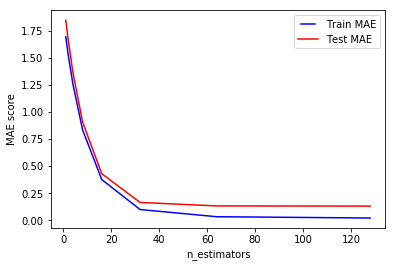

In [247]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 128]
train_results = []
test_results = []

for estimator in n_estimators:
    model_2 = ensemble.GradientBoostingRegressor(n_estimators=estimator)
    model_2.fit(X_train, y_train)

    train_pred = model_2.predict(X_train)
    train_mae = mean_absolute_error(y_train, train_pred)
    train_results.append(train_mae)

    y_pred = model_2.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_pred)
    test_results.append(test_mae)

print("Plotting n_estimators against MAE score")

line1, = plt.plot(n_estimators, train_results, 'b', label="Train MAE")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test MAE")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE score')
plt.xlabel('n_estimators')
plt.show()

The test and the train MAE look to be decreasing at a similar rate.  
The most optimal value here seems to be 32 or 64.

#### Min Samples Split

The minimum number of samples required to split an internal node.  
Increasing this value can make the tree more constrained.

Plotting min_samples_split against MAE score


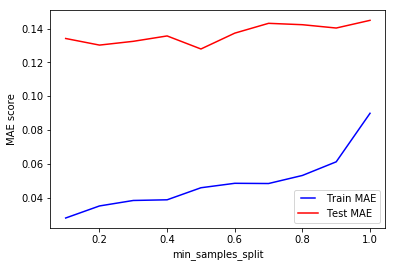

In [248]:
min_samples_splits = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    model_2 = ensemble.GradientBoostingRegressor(min_samples_split=min_samples_split)
    model_2.fit(X_train, y_train)

    train_pred = model_2.predict(X_train)
    train_mae = mean_absolute_error(y_train, train_pred)
    train_results.append(train_mae)

    y_pred = model_2.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_pred)
    test_results.append(test_mae)

print("Plotting min_samples_split against MAE score")

line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train MAE")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test MAE")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE score')
plt.xlabel('min_samples_split')
plt.show()

It seems that the model is overfitting with the higher value of min_samples_split as the MAE is both increasing for the train and test MAE.  
A value of either 0.3 or 0.7 seem to be best here.

#### Min Samples Leaf

The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

Plotting min_samples_leaf against MAE score


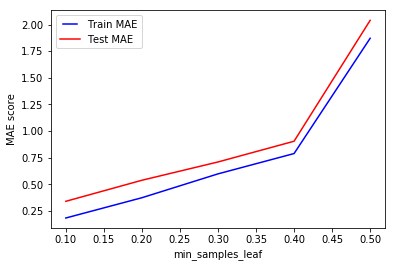

In [251]:
min_samples_leaves = [0.1, 0.2, 0.3, 0.4, 0.5]
#min_samples_leaves = [1, 3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
train_results = []
test_results = []

for min_samples_leaf in min_samples_leaves:
    model_2 = ensemble.GradientBoostingRegressor(min_samples_leaf=min_samples_leaf)
    model_2.fit(X_train, y_train)

    train_pred = model_2.predict(X_train)
    train_mae = mean_absolute_error(y_train, train_pred)
    train_results.append(train_mae)

    y_pred = model_2.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_pred)
    test_results.append(test_mae)

print("Plotting min_samples_leaf against MAE score")

line1, = plt.plot(min_samples_leaves, train_results, 'b', label="Train MAE")
line2, = plt.plot(min_samples_leaves, test_results, 'r', label="Test MAE")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE score')
plt.xlabel('min_samples_leaf')
plt.show()
#

Going from the graph there's a drastic increase in the train and test MAE error after using a value of 0.3 so that's probably the best value to choose.

#### Max Depths

Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.

Plotting max_depths against MAE score


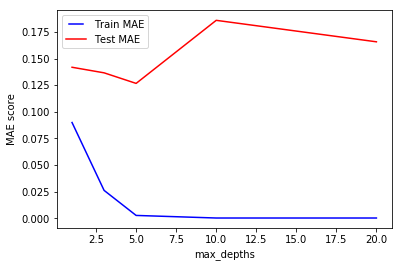

In [252]:
max_depths = [1, 3, 5, 10, 20]
train_results = []
test_results = []

for max_depth in max_depths:
    model_2 = ensemble.GradientBoostingRegressor(max_depth=max_depth)
    model_2.fit(X_train, y_train)

    train_pred = model_2.predict(X_train)
    train_mae = mean_absolute_error(y_train, train_pred)
    train_results.append(train_mae)

    y_pred = model_2.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_pred)
    test_results.append(test_mae)

print("Plotting max_depths against MAE score")

line1, = plt.plot(max_depths, train_results, 'b', label="Train MAE")
line2, = plt.plot(max_depths, test_results, 'r', label="Test MAE")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE score')
plt.xlabel('max_depths')
plt.show()

The model is quite clearly overfittting for larger depth values. The tree perfectly predicts all of the train data, however, it fails to generalize the findings for new data.  
In this case a value of 5 seems best as that's where both the train data and the test data are at their lowest points.

#### Max Features

The number of features to consider when looking for the best split.  
Choosing max_features < n_features leads to a reduction of variance and an increase in bias.

Plotting max_features against MAE score


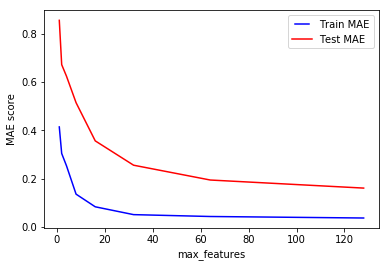

In [158]:
max_features = [1, 2, 4, 8, 16, 32, 64, 128]
train_results = []
test_results = []

for max_feature in max_features:
    model_2 = ensemble.GradientBoostingRegressor(max_features=max_feature)
    model_2.fit(X_train, y_train)

    train_pred = model_2.predict(X_train)
    train_mae = mean_absolute_error(y_train, train_pred)
    train_results.append(train_mae)

    y_pred = model_2.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_pred)
    test_results.append(test_mae)

print("Plotting max_features against MAE score")

line1, = plt.plot(max_features, train_results, 'b', label="Train MAE")
line2, = plt.plot(max_features, test_results, 'r', label="Test MAE")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE score')
plt.xlabel('max_features')
plt.show()

Having a high value for this can lead to overfitting which can be observed in the graph.
A value of 20 seems to be optimal value to use.

### Results

By inputting the values gathered from the analysis of the graphs above, the result should be a better overall MAE compared to our original MAE.

In [311]:
model_3 = ensemble.GradientBoostingRegressor(
    learning_rate = 0.05,
    n_estimators = 32,
    min_samples_split = 0.3,
    min_samples_leaf = 0.3,
    max_depth = 5,
    max_features = 'auto', 
    verbose = 1
)

model_3.fit(X_train, y_train)

train_mae = mean_absolute_error(y_train, model_3.predict(X_train))
print("Training Set Mean Absolute Error: %.3f" % train_mae)

test_mae = mean_absolute_error(y_test, model_3.predict(X_test))
print("Test Set Mean Absolute Error: %.3f" % test_mae)

# Expected results:
# Training Set Mean Absolute Error: 0.723
# Test Set Mean Absolute Error: 0.740

      Iter       Train Loss   Remaining Time 
         1           5.4944            0.03s
         2           5.0924            0.03s
         3           4.7352            0.03s
         4           4.4066            0.03s
         5           4.1214            0.02s
         6           3.8513            0.02s
         7           3.6072            0.02s
         8           3.3864            0.02s
         9           3.2219            0.02s
        10           3.0370            0.02s
        20           1.9358            0.01s
        30           1.4867            0.00s
Training Set Mean Absolute Error: 0.723
Test Set Mean Absolute Error: 0.740


There is quite a bit of improvement over the initial model with the default values. There is no longer overfitting happening and as the Validation(Test) error is low yet slightly higher than the training error.  
An optimal fit has now been achieved in the model.

### Extra

If you run the file _gridsearch.py_, it will output the parameters with the "best" results for the train set MAE and the test set MAE

In [312]:
# #overfitting values
model_4 = ensemble.GradientBoostingRegressor(
    learning_rate = 0.3, 
    max_depth = 20, 
    max_features = 'auto', 
    min_samples_leaf = 1, 
    min_samples_split = 0.1, 
    n_estimators = 64, 
    verbose = 1)

model_4.fit(X_train, y_train)

train_mae = mean_absolute_error(y_train, model_4.predict(X_train))
print("Training Set Mean Absolute Error: %.3f" % train_mae)

test_mae = mean_absolute_error(y_test, model_4.predict(X_test))
print("Test Set Mean Absolute Error: %.3f" % test_mae)
# Training Set Mean Absolute Error: 0.0003
# Test Set Mean Absolute Error: 0.1357

      Iter       Train Loss   Remaining Time 
         1           2.9671            0.13s
         2           1.5021            0.15s
         3           0.7695            0.16s
         4           0.3905            0.15s
         5           0.1955            0.14s
         6           0.0997            0.14s
         7           0.0517            0.14s
         8           0.0272            0.14s
         9           0.0146            0.14s
        10           0.0078            0.15s
        20           0.0000            0.14s
        30           0.0000            0.13s
        40           0.0000            0.09s
        50           0.0000            0.04s
        60           0.0000            0.01s
Training Set Mean Absolute Error: 0.000
Test Set Mean Absolute Error: 0.127


While this does look good initially you have to take a step back and realise what these values mean.  
The test set is virtually 0 while the test set has an error, which ultimately means that this set of parameters overfits the model